# Import Library

In [1]:
# Import Necessary Library
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset

In [3]:
# read dataset
path = "/content/drive/MyDrive/21110385 - ML/My Project/Logistic Regression/Copy of heart.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


# Self-Implementation

## Sigmoid

In [5]:
# sigmoid function
# 1/(1 + e^-z) -> z in (-inf, + inf) and g(z) in [-1, 1]
def sigmoid(z):
    return 1/(1 + np.exp(-z))

print(f"Sigmoid: {sigmoid(10000000000000)}")
print(f"Sigmoid: {sigmoid(0)}")

Sigmoid: 1.0
Sigmoid: 0.5


## Softmax

In [ ]:
# Implementation softmax function
X = np.array([[1, 2, 3, 4],
             [5, 6, 7, 8],
             [9, 10, 11, 12]])
weights = np.ones(X.shape[0]).reshape(-1, 1)
y_predict = sigmoid(np.dot(weights.T, X))
y_predict

array([[0.99999969, 0.99999998, 1.        , 1.        ]])

In [ ]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

softmax(y_predict)

array([[0.24999994, 0.25000002, 0.25000002, 0.25000002]])

## Model Formula

In [ ]:
# Generate X and y sample
X = np.random.randint(low=-100, high=100, size = 100)
y = [1 if i %2 else 0 for i in X]

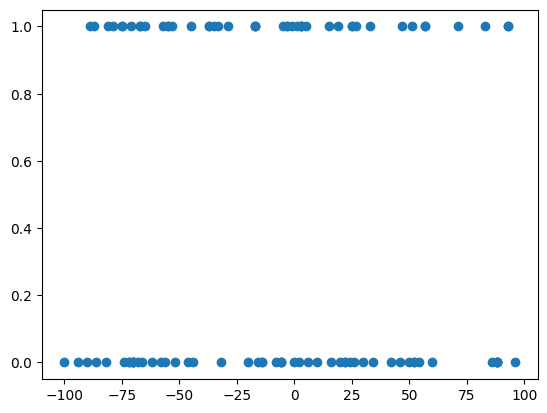

In [ ]:
# using matplotlib to plot it
plt.scatter(X, y)

In [ ]:
# Reshape X
X = X.reshape(-1, 1)

# Generate weights with the same shape
weights = np.random.rand(*X.shape)

# Generate uniform weights
# weights = np.ones(X.shape)

# Formula of Logistic Regression
# h = g(thetaTx)
y_predict = sigmoid(np.dot(X, weights.T))
# Avoid log(0)
epsilon = 1e-15
y_predict = np.clip(y_predict, epsilon, 1 - epsilon)
print(y_predict)

[[1.00000000e-15 1.05836775e-05 1.00000000e-15 ... 1.00000000e-15
  1.80233051e-08 1.00000000e-15]
 [1.00000000e+00 9.99750514e-01 1.00000000e+00 ... 1.00000000e+00
  9.99997533e-01 1.00000000e+00]
 [7.08778830e-01 5.49220196e-01 7.01654118e-01 ... 6.83217786e-01
  5.76260609e-01 7.04899043e-01]
 ...
 [1.00000000e-15 4.80298153e-06 1.00000000e-15 ... 1.00000000e-15
  5.26931372e-09 1.00000000e-15]
 [9.95211619e-01 7.65867645e-01 9.94124799e-01 ... 9.90161794e-01
  8.63497526e-01 9.94645358e-01]
 [1.00000000e-15 1.91416349e-05 1.00000000e-15 ... 1.00000000e-15
  4.53309384e-08 1.00000000e-15]]


In [ ]:
# cost function of logistic regression
y = np.array(y)
y_predict = np.array(y_predict)
cost = -np.mean(y * np.log(y_predict) + (1 - y) * np.log(1 - y_predict))

In [ ]:
cost

8.463145956119295

## Confusion matrix

In [11]:
y_predict = [0, 1, 1, 0]
y_true = [1, 0, 1, 0]

# TP = 1
# FP = 1
# TN = 1
# FN = 1
# -> balanced

# precision = TP/TP + FP
def precision(y_true, y_predict):
    TP = sum([1 for i in range(len(y_true)) if y_true[i] == y_predict[i] == 1])
    FP = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and y_predict[i] == 1])
    return TP/ (TP + FP)
precision(y_true, y_predict)

# recall = TP/TP + FN
def recall(y_true, y_predict):
    TP = sum([1 for i in range(len(y_true)) if y_true[i] == y_predict[i] == 1])
    FN = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and y_predict[i ==0]])
    return TP/(TP + FN)
recall(y_true, y_predict)

# f1_score
def f1_score(y_true, y_predict):
    return 2 * precision(y_true, y_predict) * recall(y_true, y_predict) / (precision(y_true, y_predict) + recall(y_true, y_predict))
f1_score(y_true, y_predict)

# accuracy
def accuracy(y_true, y_predict):
    return sum([1 for i in range(len(y_true)) if y_true[i] == y_predict[i]]) / len(y_true)
accuracy(y_true, y_predict)

0.5

# Using Library to train model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [13]:
# drop target
X = df.drop('target', axis=1)
y = df['target']

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# using logistic rergession
clf = LogisticRegression(random_state=2024)

# fit intt train data
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Test with many evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.949438202247191
Precision: 0.944954128440367
Recall: 0.9716981132075472
F1 Score: 0.958139534883721


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Test performance

In [15]:
# print out the confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 66,   6],
       [  3, 103]])

In [16]:
# show classification report
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        72
           1       0.94      0.97      0.96       106

    accuracy                           0.95       178
   macro avg       0.95      0.94      0.95       178
weighted avg       0.95      0.95      0.95       178



# Polynomial features

In [19]:
# Generate polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# using logistic rergession
clf = LogisticRegression(random_state=2024)

# fit intt train data
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Test with many evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.9662921348314607
Precision: 0.9629629629629629
Recall: 0.9811320754716981
F1 Score: 0.9719626168224299


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Multicollinearity and Regularization

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
np.random.seed(0)
# Generate the dataset
size = 300

X1 = np.random.normal(0, 1, size)
X2 = X1 + np.random.normal(0, 0.1, size)  # X2 is highly correlated with X1
X3 = 0.5 * X1 + 0.5 * X2 + np.random.normal(0, 0.1, size)  # X3 is correlated with X1 and X2

Y = 2 * X1 + 3 * X2 + 1.5 * X3 + np.random.normal(0,1, size)

# combined into a DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Y': Y})

# calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns[:-1]
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1] - 1)]
print(vif_data)

  feature         VIF
0      X1  119.686869
1      X2  157.409395
2      X3  111.435351


In [28]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['X1', 'X2', 'X3']], df['Y'], test_size=0.2, random_state=42)

# Fit a standard linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Fit a Ridge regression model with a higher alpha for a better effect on multicollinearity
ridge_model = Ridge(alpha=100)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate the performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Output the results
print("Variance Inflation Factor (VIF):")
print(vif_data)
print("\nLinear Regression - MSE: {:.2f}, R2: {:.3f}".format(mse_lr, r2_lr))
print("Ridge Regression - MSE: {:.2f}, R2: {:.3f}".format(mse_ridge, r2_ridge))

Variance Inflation Factor (VIF):
  feature         VIF
0      X1  119.686869
1      X2  157.409395
2      X3  111.435351

Linear Regression - MSE: 0.86, R2: 0.985
Ridge Regression - MSE: 1.98, R2: 0.965


# Feature Selection

- Feature importance
- filter methods: correlation or mutual information, Pearson's correlation
- Wrapper method
- Embedded method: Lasso and decision tree

# Hyperparameter Tuning

- GridSearch
- Randomized Search

# Advanced Model Evaluation Metrics and Techniques

- AUC
- F-beta
- Precision-Recall Curve
- ROC